In [2]:
import pandas as pd
from scipy.stats import pearsonr

In [12]:
df=pd.read_csv('Combined WindSpeed and MIShifted.csv')

In [13]:
df

,system:time_start,ResultantVelocity,MangroveIndex
0,28-02-2019,0.669806,0.195136
1,31-03-2019,1.247643,0.189660
2,30-04-2019,2.183516,0.130641
3,31-05-2019,2.593100,0.131874
4,30-06-2019,4.003935,0.203639
5,31-07-2019,2.869900,0.190589
6,31-08-2019,4.818290,0.285313
7,30-09-2019,2.910194,0.281532
8,31-10-2019,3.410233,0.277750
9,30-11-2019,1.517097,0.059470


In [14]:
V=df['ResultantVelocity']
MI=df['MangroveIndex']
dates = df['system:time_start']


In [15]:
corr=pearsonr(V,MI)
corr

PearsonRResult(statistic=0.6048619857868358, pvalue=0.0022313486411091026)

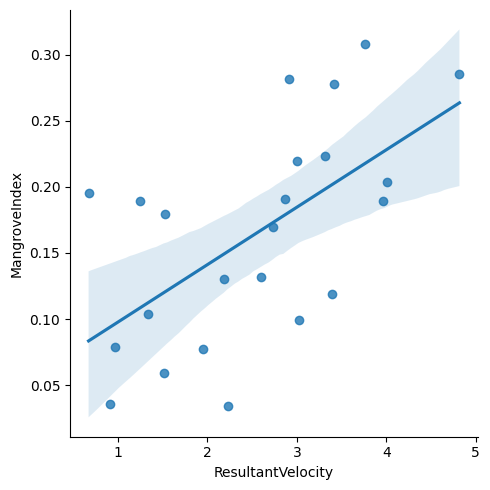

In [16]:
import seaborn as sns
sns.lmplot(x="ResultantVelocity", y="MangroveIndex", data=df);

In [17]:
from scipy import stats
stats.pearsonr(V,MI)


PearsonRResult(statistic=0.6048619857868358, pvalue=0.0022313486411091026)

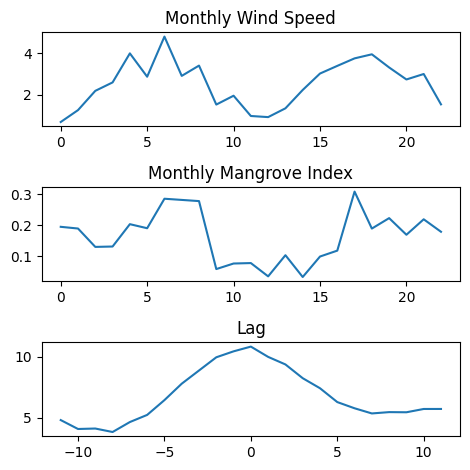

In [18]:
import numpy as np
from scipy import signal
correlation = signal.correlate(V,MI, mode="same")
lags = signal.correlation_lags(V.size, MI.size, mode="same")
lag = lags[np.argmax(correlation)]
import matplotlib.pyplot as plt

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(V)
ax_orig.set_title('Monthly Wind Speed')
ax_noise.plot(MI)
ax_noise.set_title('Monthly Mangrove Index')

ax_corr.set_title('Lag')
ax_corr.plot(lags, correlation)
plt.tight_layout()
plt.show()

In [19]:
lag

0

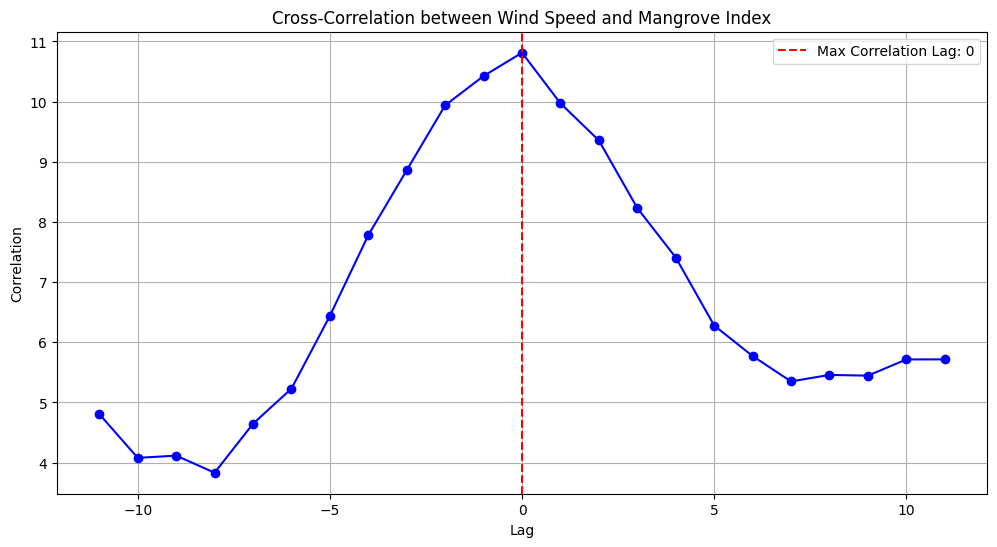

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(lags, correlation, marker='o', linestyle='-', color='b')
plt.axvline(x=lag, color='r', linestyle='--', label=f'Max Correlation Lag: {lag}')
plt.title('Cross-Correlation between Wind Speed and Mangrove Index')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.show()
